#開始

In [1]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [40]:
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)

.config
062702.csv
070101.csv
070103.csv
070203.csv
240305-1_130_10.csv
070201.csv
062701.csv
240305-2_130_10.csv
070102.csv
070202.csv
sample_data


# データ変更

In [74]:
file_name = "062702.csv" # @param {type:"string"}
t = 0.52 # @param {type:"number"}
w = 0.003 # @param {type:"number"}
x = 0.01 # @param {type:"number"}

df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
#df = df.iloc[:, :-11]
#df = df.iloc[:, 12:]
df = df - t
m = df.median().median()
#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)

#pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size
#pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size
pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pall = df.iloc[2:63,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[2:63,9:120].size
#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
#pinn = df.iloc[4:60,19:110][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,19:110].size

pall =round(pall*100,1)
pinn =round(pinn*100,1)

グラフ

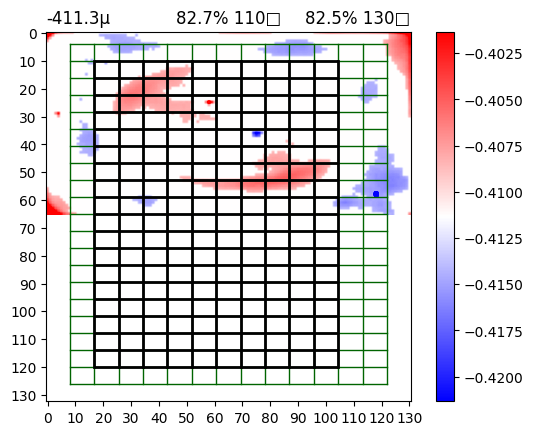

In [70]:
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
df[(df>=m-w)&(df<=m+w)] = m
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))

for i in range(0, 14, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2], color='darkgreen', linewidth=1)
for j in range(0, 21, 1):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='darkgreen', linewidth=1)
for i in range(1, 12, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2], color='black', linewidth=2)
for j in range(1, 20, 1):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='black', linewidth=2)

ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
fig.colorbar(im)
plt.show()

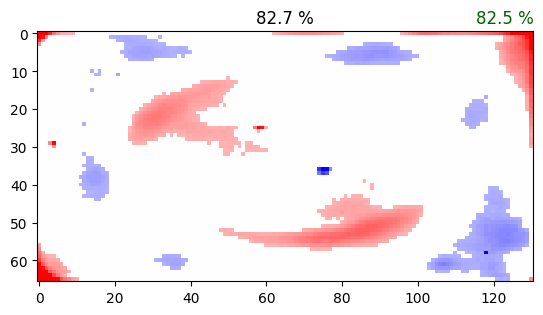

In [64]:
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
df[(df>=m-w)&(df<=m+w)] = m
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_title(str(pall)+" %", loc='right', color='darkgreen')
ax.set_title(str(pinn)+" %", loc='center', color='black')
plt.show()

062701.csv.png


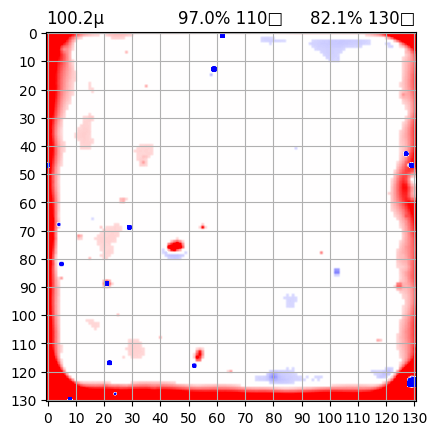

In [4]:
df[(df>=m-w)&(df<=m+w)] = m
#df.iloc[23:41, 41:59] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [52]:
df.to_csv(file_name+'(z).csv', index=False)
#fig.savefig("img.png",transparent=True)

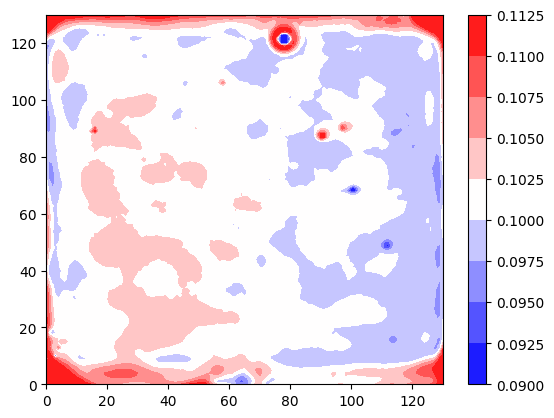

In [ ]:
df[(df>=m+x)] = m+x
df[(df<=m-x)] = m-x
plt.contourf( df.values,cmap=cmap)
plt.colorbar() # Add a colorbar to show the values
plt.show()
#print(m-x,m+x)

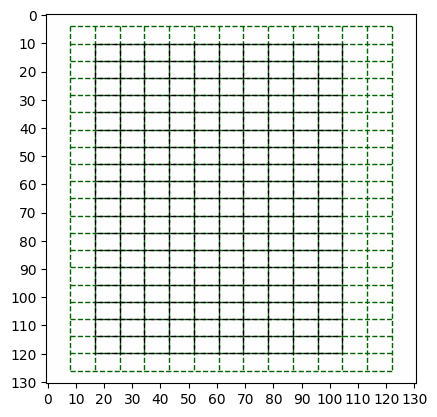

In [88]:
fig, ax = plt.subplots()
df[(df<9)] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)
cmap = plt.get_cmap('bwr')
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
for i in range(0, 14, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2],linestyle = "--", color='darkgreen', linewidth=1)
for j in range(0, 21, 1):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='darkgreen', linewidth=1)
for i in range(1, 12, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2],linestyle = "--", color='black', linewidth=1)
for j in range(1, 20, 1):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='black', linewidth=1)

plt.show()

In [ ]:
plt.show()